In [6]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display

 Environmental, social, and governance (**ESG**)

Net Asset Value is the net value of an investment fund's assets less its liabilities, divided by the number of shares outstanding.

In [7]:
# lifestrategy = [x for x in os.listdir(URL) if 'LifeStrategy' in x]
# bonds = [x for x in os.listdir(URL) if 'Bond' in x]
# sustain = [x for x in os.listdir(URL) if 'SustainableLife' in x]
# retirement = [x for x in os.listdir(URL) if 'Target Retirement' in x]
# stocks = [x for x in os.listdir(URL) if 'Stock' in x]

In [11]:
URL = '../files/'

In [12]:
stocks = ['-'.join(x.split('-')[1:-1]) for x in os.listdir(URL)]
stocks

['08']

In [13]:
def plot_graphs(sets):
    sets = meth.ceil(len(sets)/2)
    fig, axs = plt.subplots(nrows=rows, ncols=2, figsize=(30, 30))

    for i, l in enumerate(sets):
        row = math.ceil(i/2)
        col = i % 2
        d = pd.read_excel(URL + l, skiprows = 8, error_bad_lines=False)
        d = prepare_df(d)
        d.plot(x=d.columns[0], y=d.columns[1], title=f'{file}', ax=axs[row][col])

In [14]:
def prepare_df(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df[df.columns[1]] = df[df.columns[1]].str.replace('£', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('CHF', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('€', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('$', '')
    df[df.columns[1]] = df[df.columns[1]].str.replace('A', '')
    df[df.columns[1]] = df[df.columns[1]].astype(float)
    return df

In [15]:
def show(url):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30, 50))

    d = pd.read_excel(url, skiprows = 8, error_bad_lines=False)
    d = prepare_df(d)
    title = url.split('-')[1:-2]
    d.plot(x=d.columns[0], y=d.columns[1], title=f'{title}', figsize=(30, 25), ax=axs[0])
    
    d['year'] = d['Date'].dt.year

    dz = d.groupby('year').mean()
    dz['performance'] = 1.1
    for (nxt, prev) in zip(dz.iloc[1:, :].iterrows(), dz.iterrows()):
        col = dz.columns[0]
        i, row1 = prev
        j, row2 = nxt
        dz.at[i, 'performance'] = (row2[col]-row1[col])*100/row1[col]
    
    print(dz)
    
    ax = dz.plot(y='performance', figsize=(30, 25), ax=axs[1], kind='bar')
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.axhline(y=dz['performance'].mean(), color='b', linestyle='--')
    plt.text(0, 
             round(dz['performance'].mean(), 2), 
             f"{round(dz['performance'].mean(), 2)}", 
             transform=ax.get_yaxis_transform(),
             c='b')

In [16]:
out = widgets.Output(layout={'border': '1px solid black'})

stock_button = widgets.Dropdown(
    options=stocks,
    value=stocks[0],
    description='Stock name:',
    disabled=False,
)

run_button = widgets.Button(
    description='Run',
    disabled=False,
    button_style='',
    tooltip='Click me',
    icon='check'
)

spacer = widgets.HTML(
     "<style>.left-spacing-class {margin-left: 10px;}</style>"
)

def on_button_clicked(b):
    with out:
        out.clear_output()
        print("Button clicked.")

run_button.on_click(on_button_clicked)

box = widgets.VBox([stock_button, widgets, run_button])
display(box)

TraitError: Element of the 'children' trait of a VBox instance must be a Widget, but a value of <module 'ipywidgets' from 'R:\\Work\\Anacond\\lib\\site-packages\\ipywidgets\\__init__.py'> <class 'module'> was specified.

In [ ]:
out

In [2]:
df

NameError: name 'df' is not defined

In [4]:
df_years = df.groupby(df.dt.year).count()
df_years

NameError: name 'df' is not defined

In [ ]:
    data = [
        go.Bar(
            x=df['x'], # assign x as the dataframe column 'x'
            y=df['y']
        )
    ]

    graphJSON = json.dumps(data, cls=plotly.utils.PlotlyJSONEncoder)

    return graphJSON

In [ ]:
    ax = go.plot(y='performance', figsize=(30, 25), ax=axs[1], kind='bar')
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.axhline(y=dz['performance'].mean(), color='b', linestyle='--')
    plt.text(0, 
             round(dz['performance'].mean(), 2), 
             f"{round(dz['performance'].mean(), 2)}", 
             transform=ax.get_yaxis_transform(),
             c='b')

       NAV (GBP)  performance
year                         
2011   94.099431     7.900740
2012  101.533982    19.832597
2013  121.670807     8.383969
2014  131.871650     9.467270
2015  144.356295     9.903963
2016  158.653289    23.372901
2017  195.735165     6.508232
2018  208.474063     6.842364
2019  222.738618     3.153975
2020  229.763737    22.201981
2021  280.775839     2.258549
2022  287.117298     1.100000


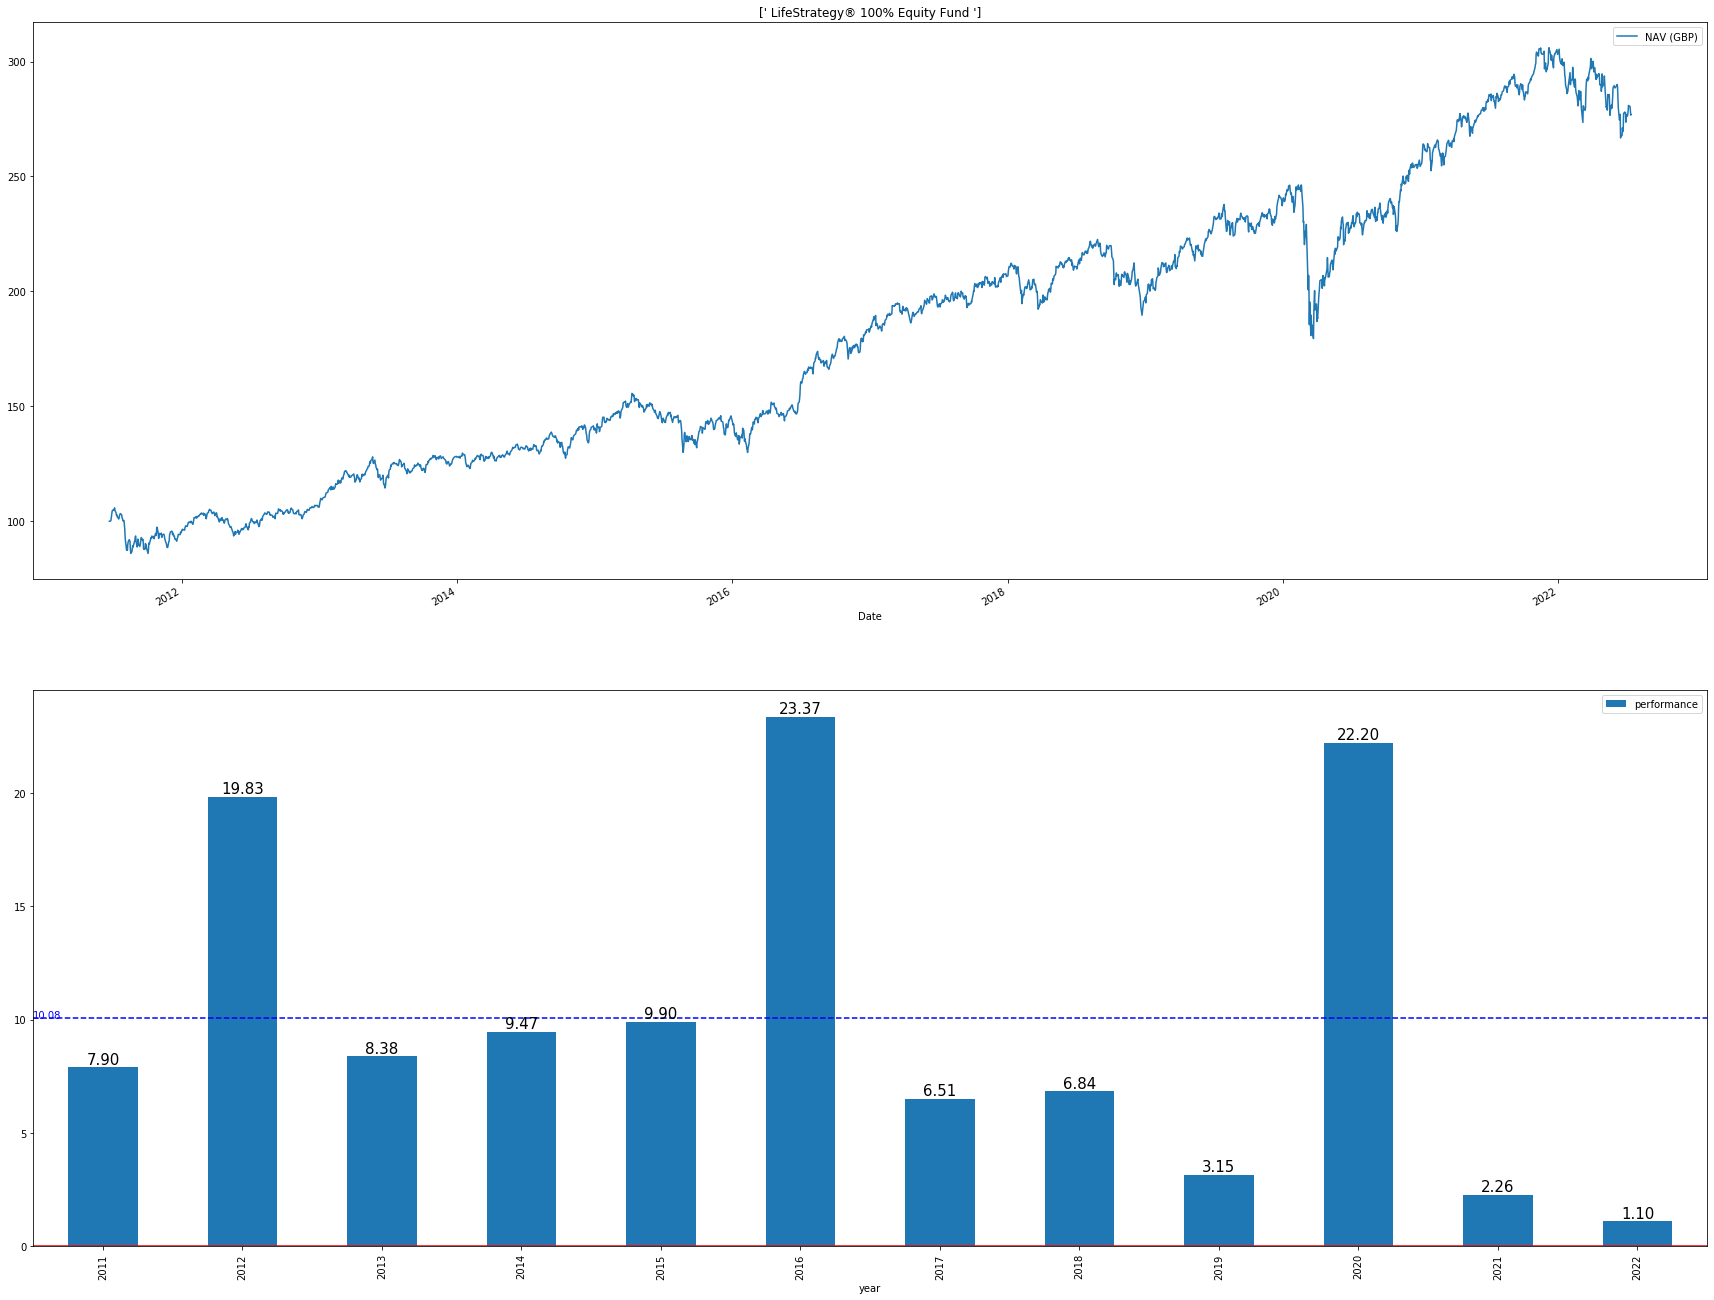

In [14]:
show(URL + lifestrategy[0])

       NAV (GBP)  performance
year                         
2011  102.555642     7.830829
2012  110.586598     6.071206
2013  117.300538     4.073216
2014  122.078443     6.522221
2015  130.040668     6.436330
2016  138.410515     5.849642
2017  146.507035     1.342453
2018  148.473823     6.428217
2019  158.018043     5.948619
2020  167.417934     4.423008
2021  174.822842    -5.349442
2022  165.470796     1.100000


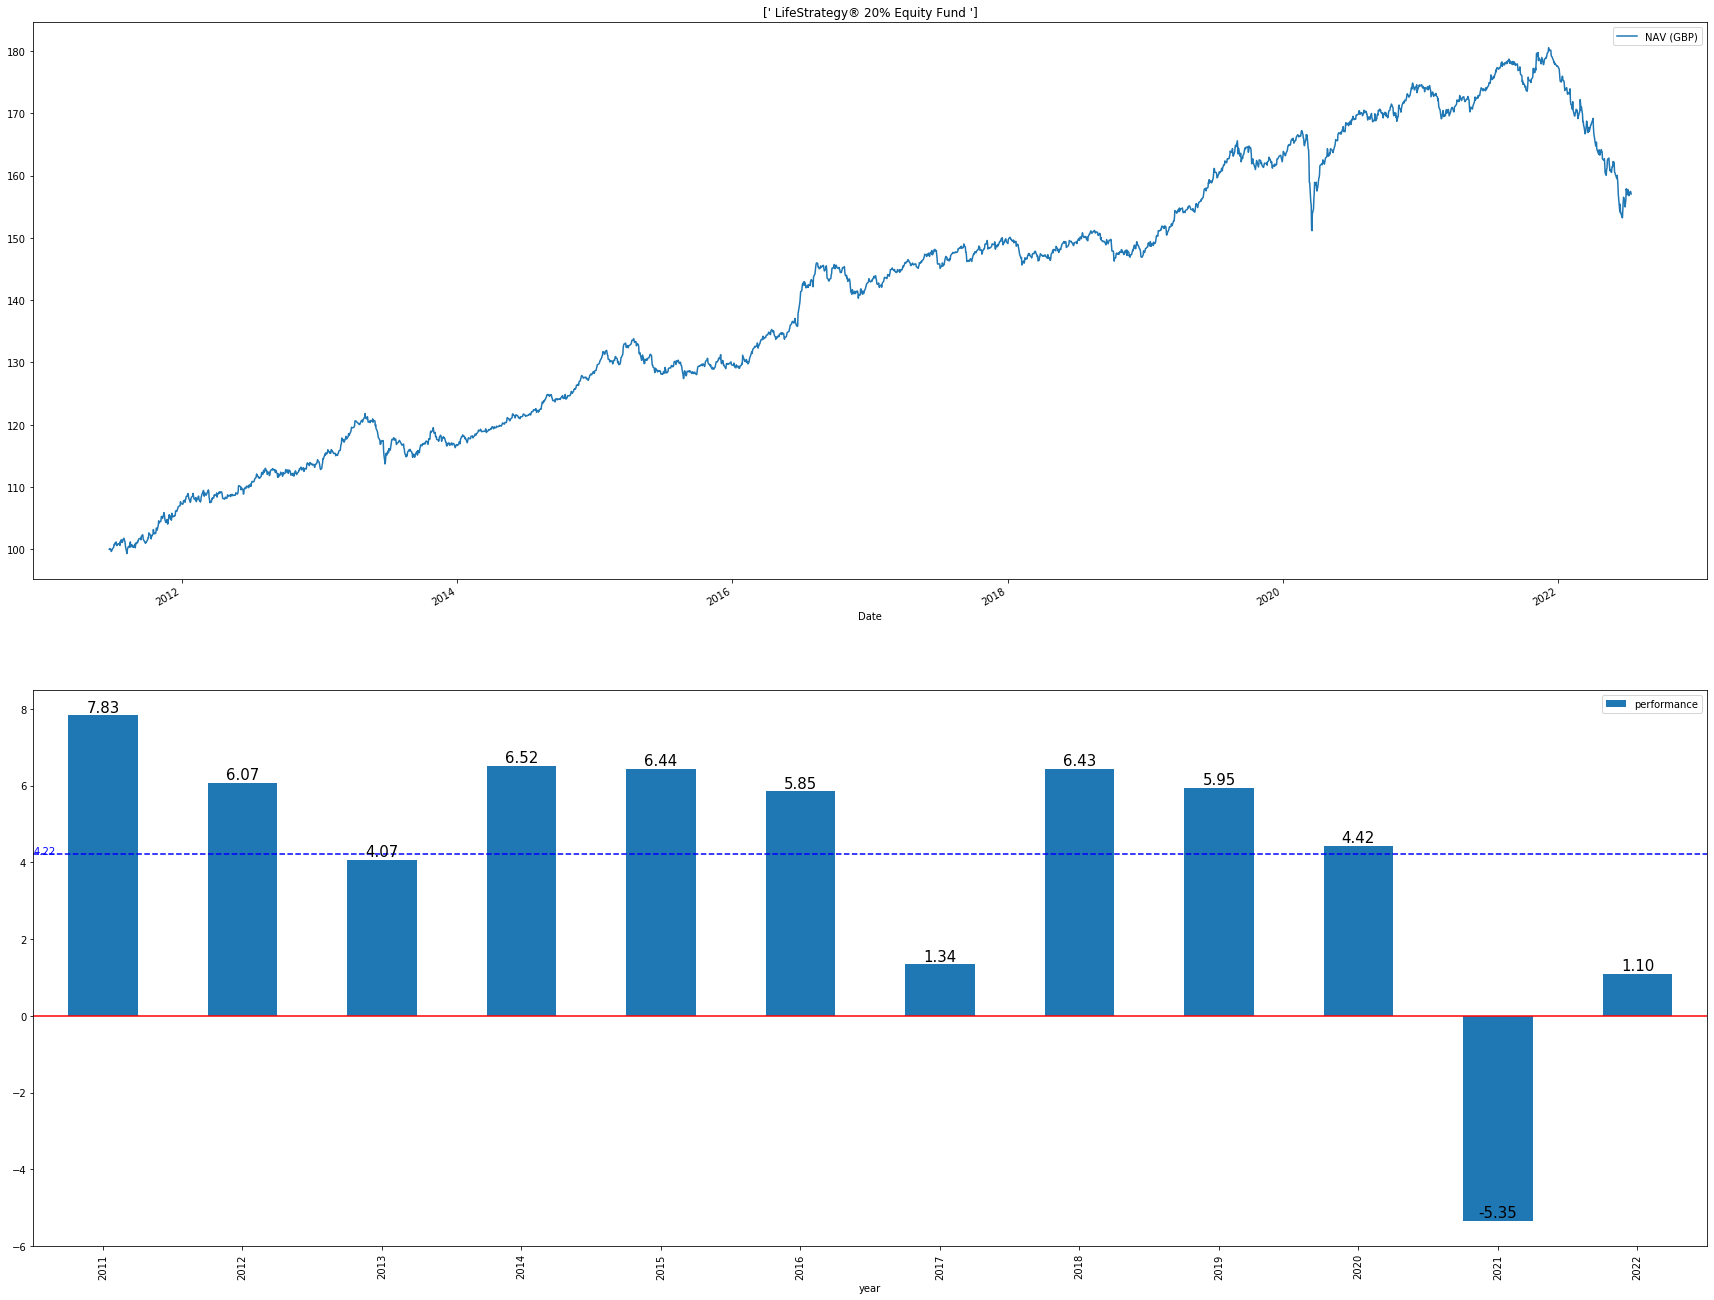

In [15]:
show(URL + lifestrategy[1])

       NAV (GBP)  performance
year                         
2011  100.678403     8.196370
2012  108.930377     9.244065
2013  118.999972     5.228673
2014  125.222092     7.373215
2015  134.454985     7.473680
2016  144.503721    10.110896
2017  159.114341     2.480289
2018  163.060838     6.426662
2019  173.540206     5.358171
2020  182.838787     8.623017
2021  198.605007    -3.594258
2022  191.466630     1.100000


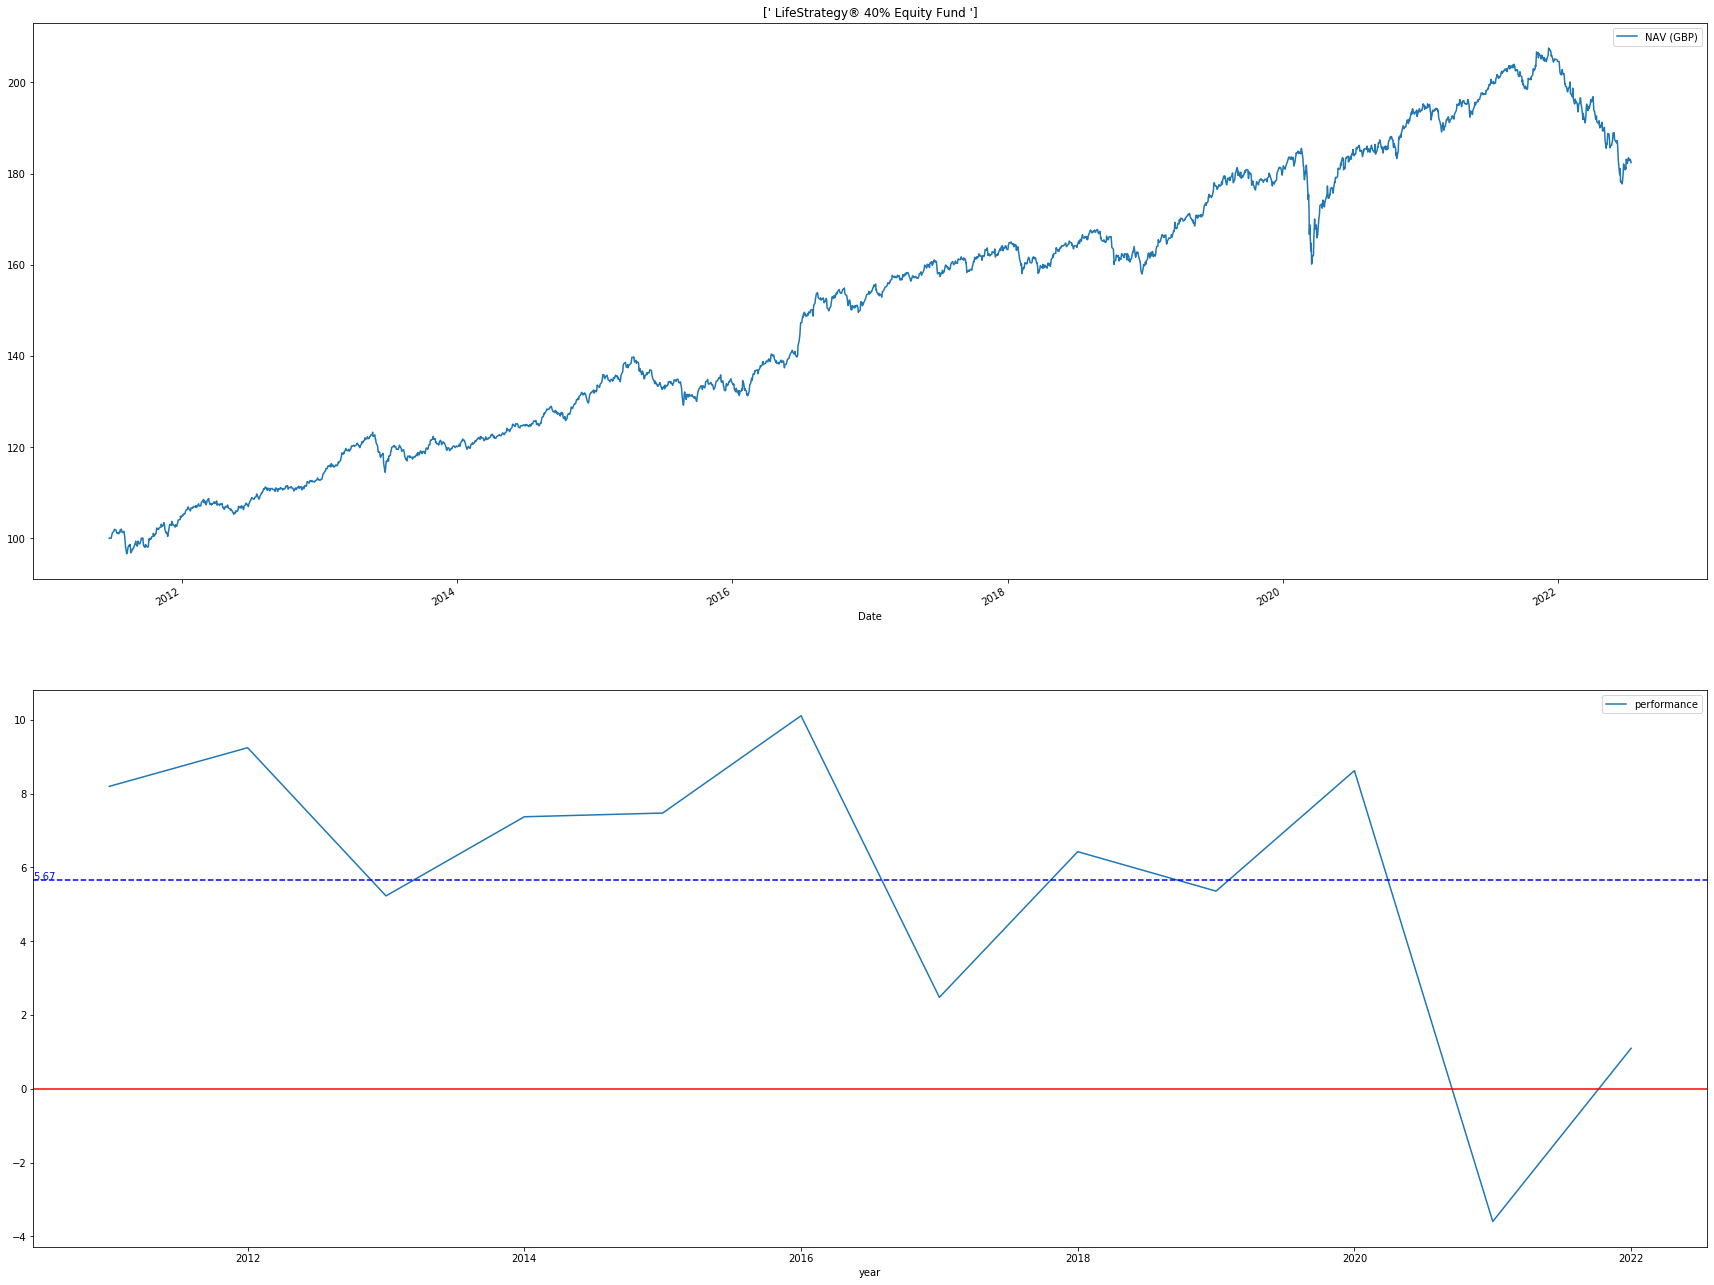

In [92]:
show(URL + lifestrategy[2])

       NAV (GBP)  performance
year                         
2011   98.574792     8.275986
2012  106.732828    12.679420
2013  120.265931     6.270693
2014  127.807439     8.156725
2015  138.232340     8.325876
2016  149.741393    14.463395
2017  171.399083     3.876620
2018  178.043574     6.593643
2019  189.783131     4.729049
2020  198.758068    13.157635
2021  224.909929    -1.786038
2022  220.892953     1.100000


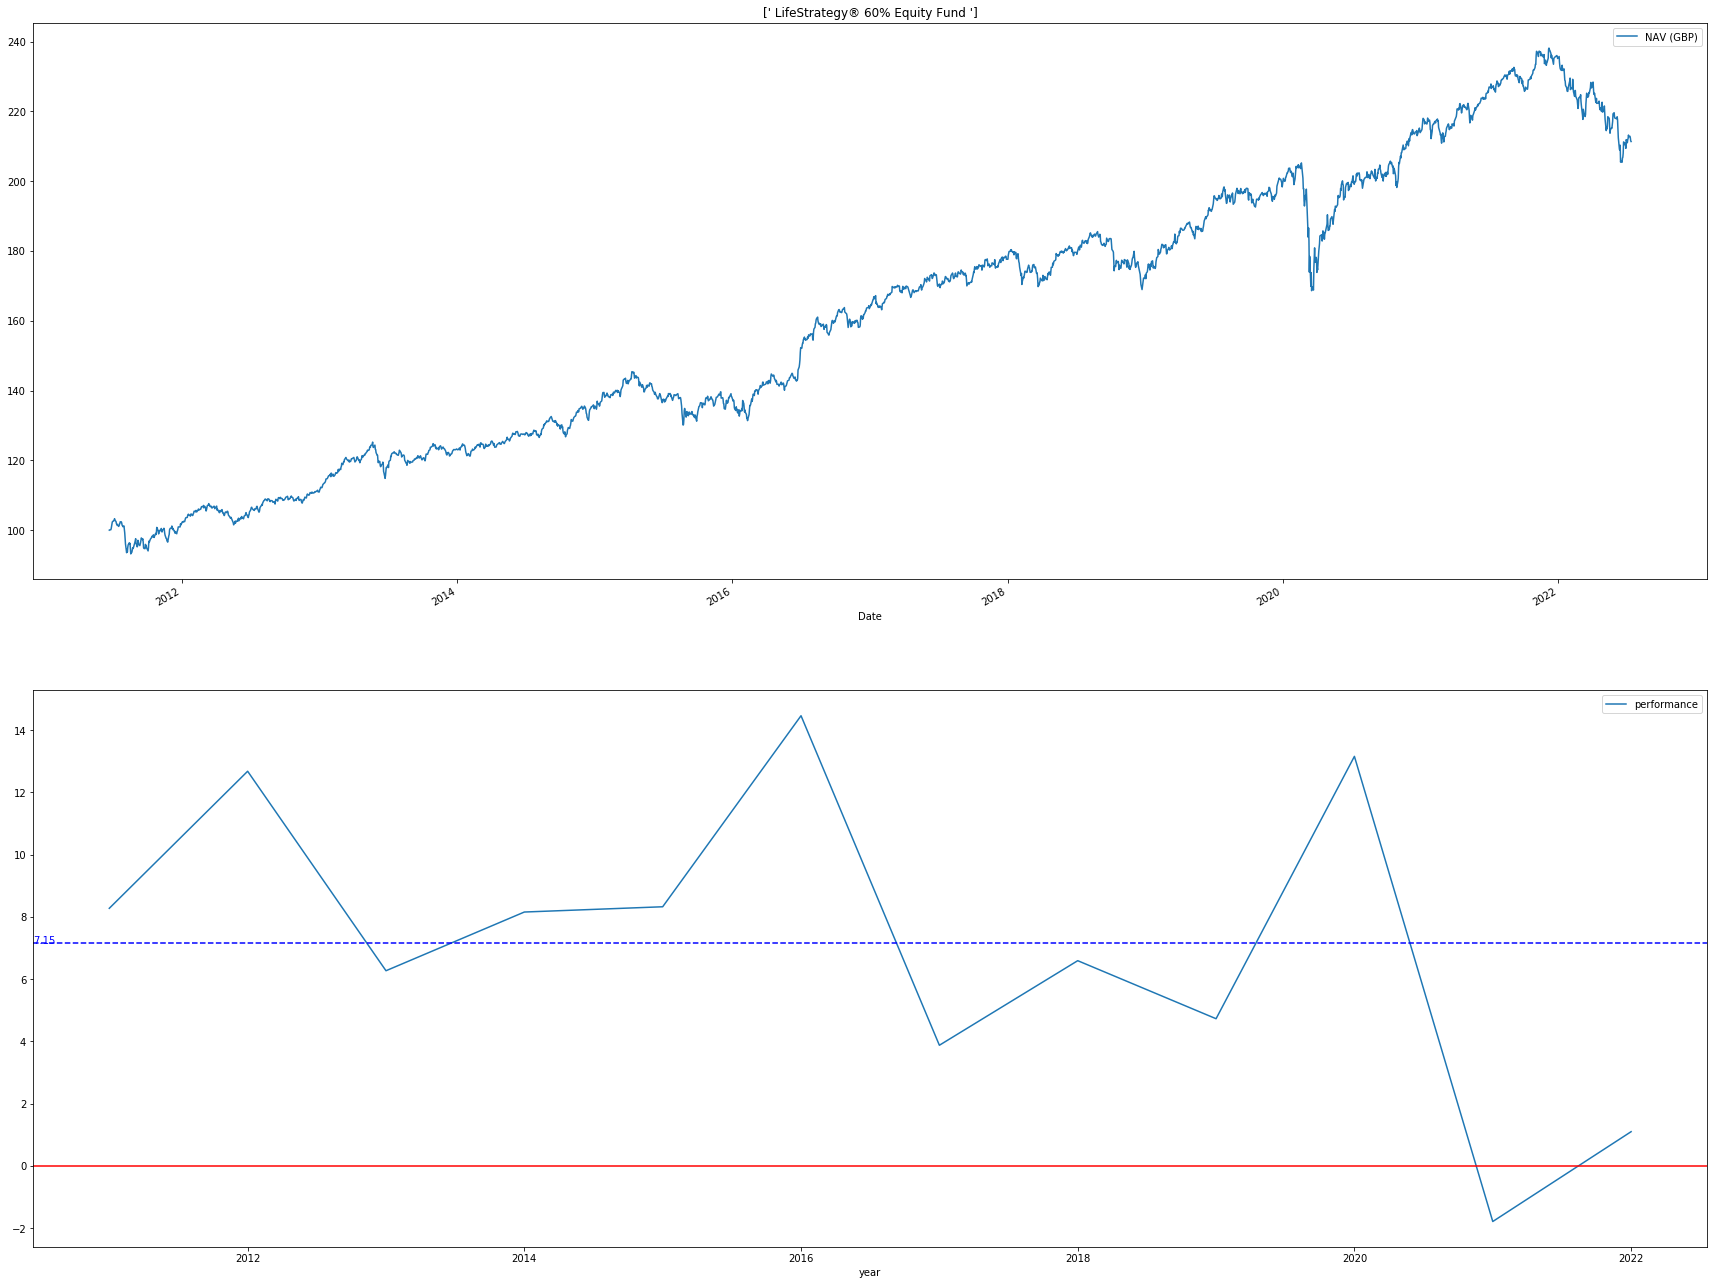

In [93]:
show(URL + lifestrategy[3])